### Student Name: Chelliah Kanthanathan
### Student ID: 18263003

### TASK 3: Create your own implementation of linear classification to perform a classification of the dataset provided. Use normal linear regression with sign(wTx) to obtain a classification.

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [72]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)
y = [yy if yy == 1 else -1 for yy in y] 

In [73]:
print (X.shape)

(1000, 2)


In [74]:
print (len(y))

1000


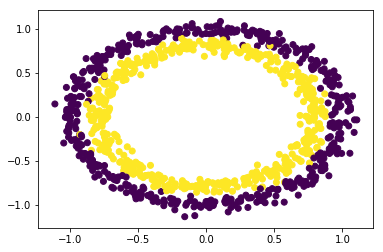

In [75]:
plt.scatter(X[:,0], X[:,1], c=y)

# In House Linear Classification

In [76]:
# Calculate the pseudoinverse of X
X_inverse = np.linalg.pinv(X)
print (X_inverse)
print (X_inverse.shape)

[[ 6.92558808e-05  3.81558106e-04  3.20214928e-04 ... -4.03554496e-04
   1.98642834e-03  2.22596611e-03]
 [ 2.28529021e-03 -1.79770033e-03 -2.31746011e-03 ...  2.09920753e-03
   1.56271707e-03  1.22472951e-03]]
(2, 1000)


In [77]:
# Find the coefficients 
coefficients = X_inverse.dot(y)
print (coefficients)
print (coefficients.shape)

[-0.00454138  0.00646794]
(2,)


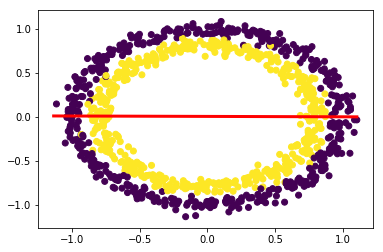

In [78]:
# Plot the data and best fit line
X_min = np.min(X)
X_max = np.max(X)
X_fit = np.linspace(X_min, X_max, 1000)
y_fit = coefficients[0]*X_fit + coefficients[1]

plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(X_fit, y_fit,'r',linewidth=3)
plt.show()

In [79]:
mse = mean_squared_error(y, y_fit)
rmse = np.sqrt(mse)
print ("RMSE - In House Linear Classification:", rmse)

RMSE - In House Linear Classification: 1.00005272907818


### The above plot shows that the datapoints are not linearly separable, Thus the best fit was half of it i.e. in the middle of circle for make circle data sets. The In House Linear Classification alogorithm could not find the best fit classification line.

# SKlearn LinearRegression

### Compare the Result between sklearn LinearRegression and In House Linear Classification

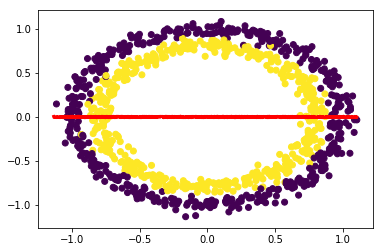

In [81]:
# Using sklearn LinearRegression on the make circle data points
model_linear = LinearRegression(fit_intercept=True)
model_linear.fit(X, y)

max_x = np.max(X) 
min_x = np.min(X)

xfit = np.linspace(min_x, max_x, 1000)
yfit = model_linear.predict(X)

plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(xfit, yfit,'r',linewidth=3)

### Once again the sklearn LinearRegression proves that the best fit could be in the middle i.e. in the middle of circle for make circle data sets

In [82]:
mse = mean_squared_error(y, yfit)
rmse = np.sqrt(mse)
print ("RMSE - SKlearn Linear Regression:", rmse)

RMSE - SKlearn Linear Regression: 0.9999870899404824


#### Now choose suitable new features and use these in your linear classification algorithm to improve the classification performance. Observe and explain (use plots where appropriate) why the classification performance has improved. Try a few different ones and note the differences!

#### Transofrm data from non linear relationship to linear relationship using basis functions

#### Method 1: Using Gaussian basis functions

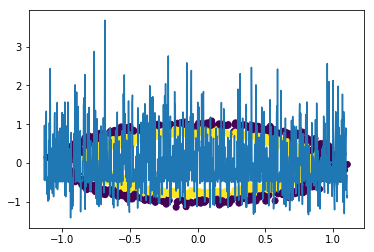

In [83]:
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(X, y)
yfit = gauss_model.predict(X)

plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(xfit, yfit)

#### Method 2: Using PolynomialFeatures transformer basis functions

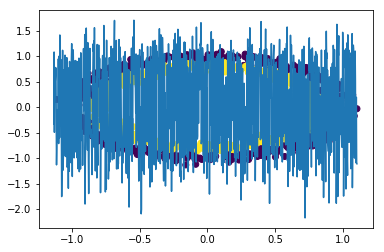

In [84]:
poly_model = make_pipeline(PolynomialFeatures(3),
                          LinearRegression())

poly_model.fit(X,y)

max_x = np.max(X)
min_x = np.min(X)
xfit = np.linspace(min_x, max_x, 1000)

yfit = poly_model.predict(X)

plt.scatter(X[:,0], X[:,1], c=y)

plt.plot(xfit, yfit);

#### Method 3: SQUARE the DATA POINTS

#### In House Linear Classification

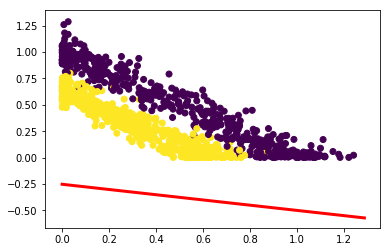

In [85]:
X_square = np.square(X)
# Calculate the pseudoinverse of X square
X_square_inverse = np.linalg.pinv(X_square)

# Find the coefficients 
X_square_coefficients = X_square_inverse.dot(y)

# Plot the data and best fit line
X_square_min = np.min(X_square)
X_square_max = np.max(X_square)
X_square_fit = np.linspace(X_square_min, X_square_max, 1000)
yy_fit = X_square_coefficients[0]*X_square_fit + X_square_coefficients[1]

plt.scatter(X_square[:,0], X_square[:,1], c=y)
plt.plot(X_square_fit, yy_fit,'r',linewidth=3)
plt.show()

### TODO - Find a way to move the best fit line in the middle of data points

In [86]:
mse = mean_squared_error(y, yy_fit)
rmse = np.sqrt(mse)
print ("RMSE - SQUARE the DATA POINTS - In House Linear Classification:", rmse)

RMSE - SQUARE the DATA POINTS - In House Linear Classification: 1.0867944731285732


#### SKLearn Linear Regression

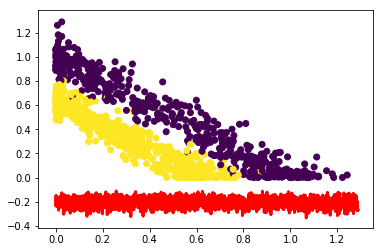

In [87]:
model_linear = LinearRegression(fit_intercept=False)
model_linear.fit(X_square , y)

max_x = np.max(X_square) 
min_x = np.min(X_square)

xfit = np.linspace(min_x, max_x, 1000)
yfit = model_linear.predict(X_square )

plt.scatter(X_square[:,0], X_square[:,1], c=y)
plt.plot(xfit, yfit,'r',linewidth=3)

In [88]:
mse = mean_squared_error(y, yfit)
rmse = np.sqrt(mse)
print ("RMSE - SQUARE the DATA POINTS - SKlearn Linear Regression:", rmse)

RMSE - SQUARE the DATA POINTS - SKlearn Linear Regression: 0.9772519153364101


# Logistic Regression

In [89]:
model_logistic = LogisticRegression(solver='lbfgs')
model_logistic.fit(X,y)
Y_pred = model_logistic.predict(X)

In [90]:
# Calculating RMSE
mse = mean_squared_error(y, Y_pred)
rmse = np.sqrt(mse)

In [91]:
print("RMSE:", rmse)

RMSE: 1.417039166713468
